In [80]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr
import datetime as dt

def v2rho_2d(var_v):
    [M,Lp]=var_v.shape
    var_rho=np.zeros((M+1,Lp))
    var_rho[1:M-1,:]=0.5*np.squeeze([var_v[0:M-2,:]+var_v[1:M-1,:]])
    var_rho[0,:]=var_rho[1,:]
    var_rho[M,:]=var_rho[M-1,:]
    return var_rho

def u2rho_2d(var_u):
    [Mp,L]=var_u.shape
    var_rho=np.zeros((Mp,L+1))
    var_rho[:,1:L-1]=0.5*np.squeeze([var_u[:,0:L-2]+var_u[:,1:L-1]])
    var_rho[:,0]=var_rho[:,1]
    var_rho[:,L]=var_rho[:,L-1]
    return var_rho

In [81]:
###############################################
############## DATA EXTRACTION ################
###############################################

## data extraction 
#model_data='/media/jenny/Wolverine/roms_avg_Y2007M1_3km.nc'
model_data='/home/jenny/Desktop/ModelAssessment/WOESII_MM_SST_NEW2.nc'

DS=xr.open_dataset(model_data)

## extract the required variables

Mon_roms=DS['month'].values
Year_roms=DS['year'].values
lon_roms=DS['lon'].values
lat_roms=DS['lat'].values
mask_roms=DS['mask'].values

#Temp_roms=DS['temp'].values
#lon_roms=DS['lon_rho'].values
#lat_roms=DS['lat_rho'].values
#mask_roms=DS['mask_rho'].values

temp=DS['temp'].values[:,:,:]

In [97]:
np.shape(temp)

(12, 578, 674)

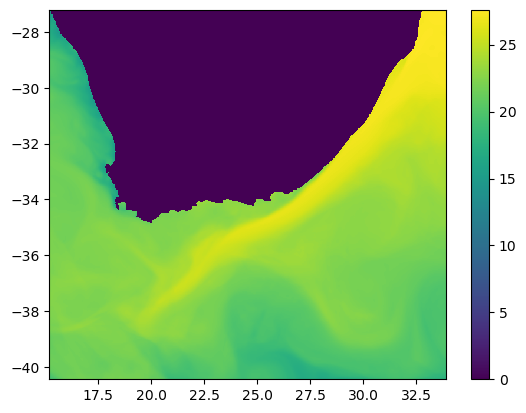

In [86]:
plt.pcolor(lon_roms,lat_roms,temp[0,:,:])
plt.colorbar()

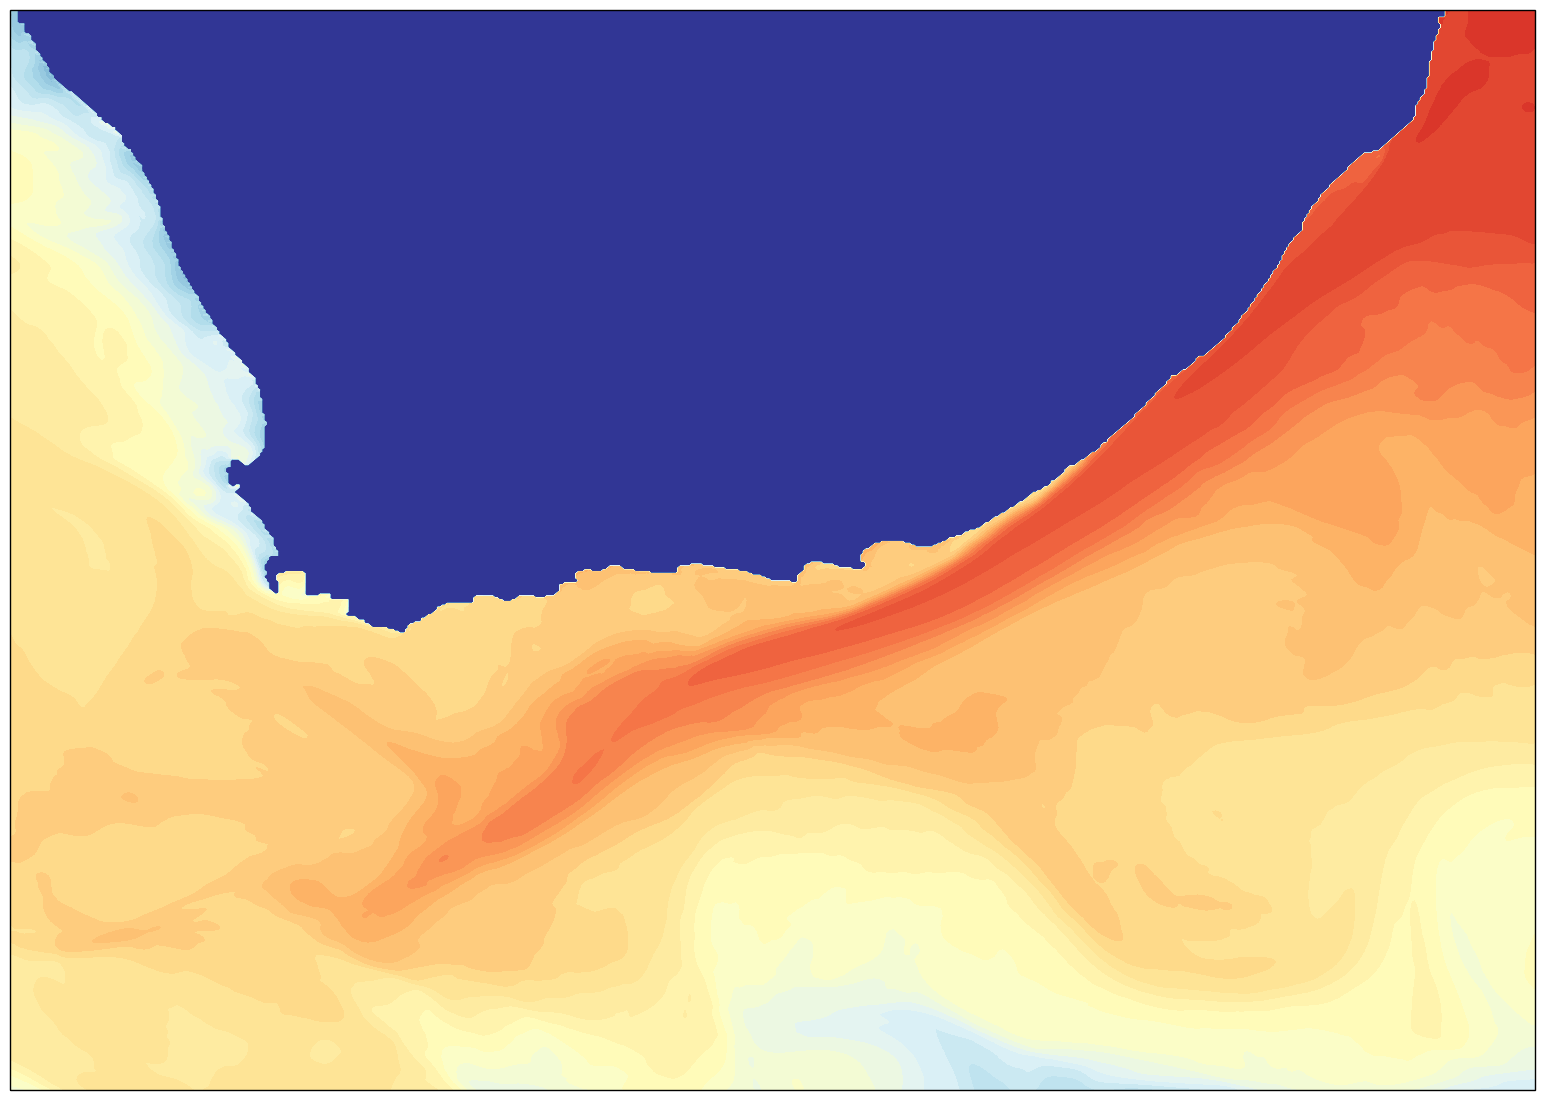

In [88]:
fig = plt.figure(figsize=(19.20,10.80))
ax = fig.add_axes([0, 0, 1, 1], projection=ccrs.PlateCarree())

ax.add_feature(cartopy.feature.LAND, facecolor=(0.8,0.8,0.8))
plt.contourf(lon_roms, lat_roms, temp[0,:,:], 64,
             transform=ccrs.PlateCarree(),cmap='RdYlBu_r',vmin=10,vmax=30)

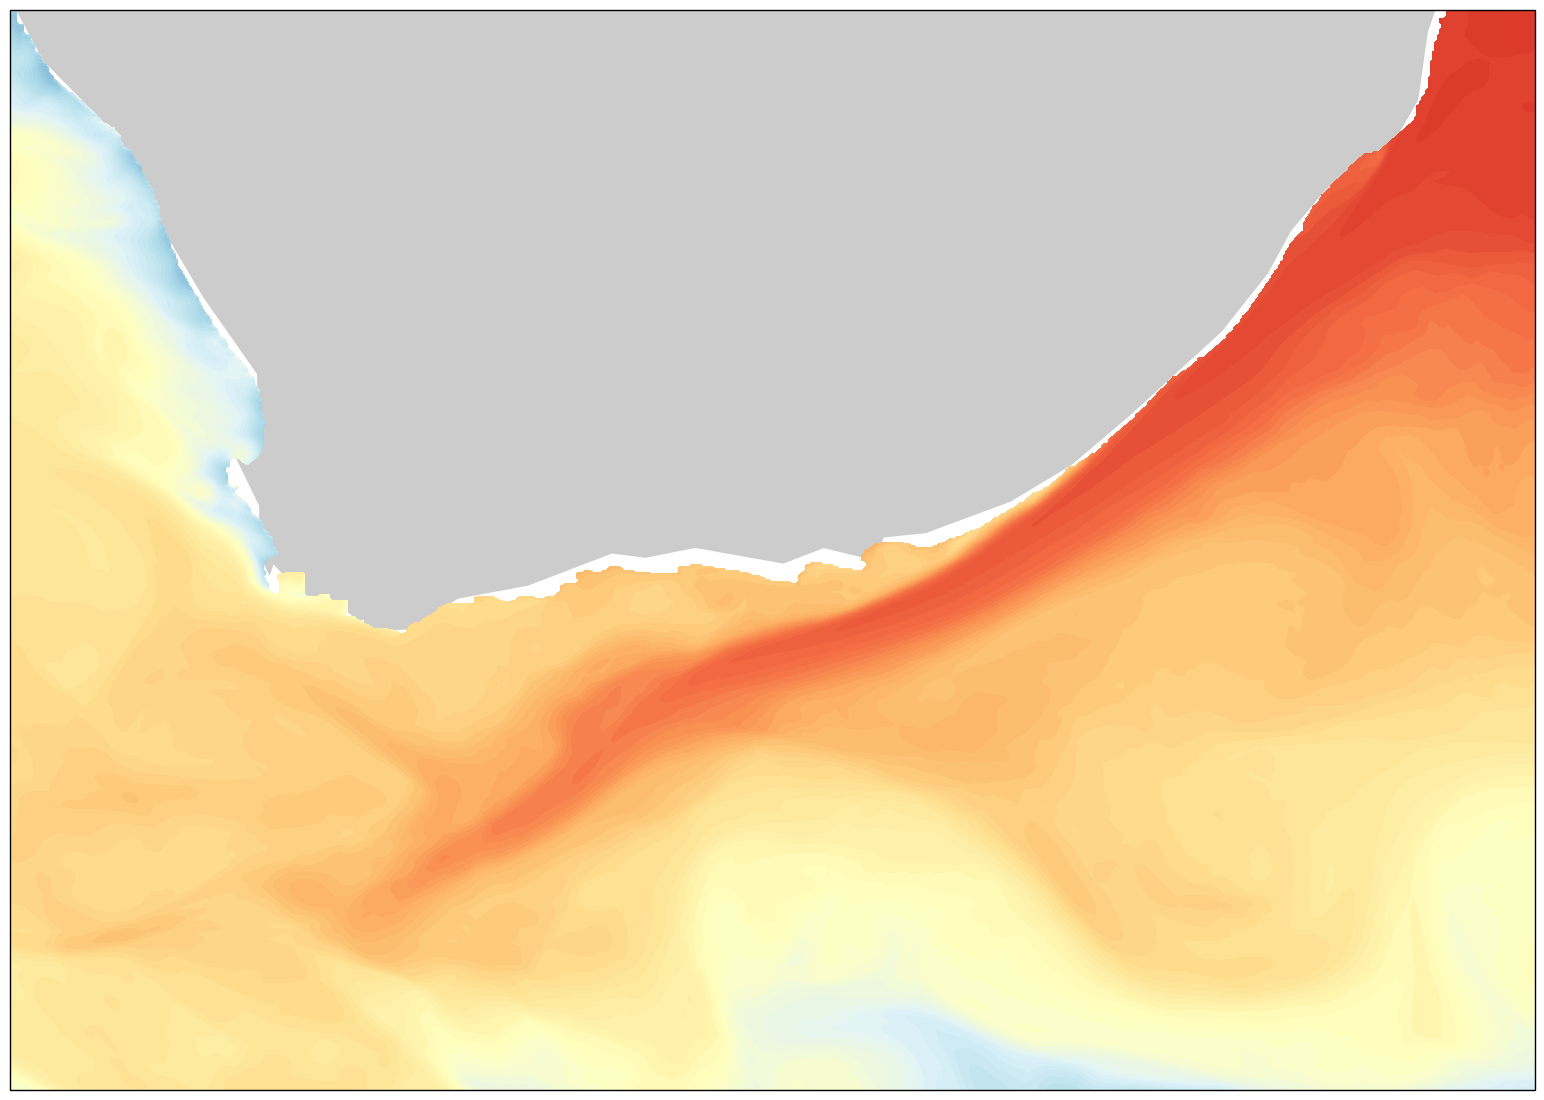

In [115]:
## plot of SST
import os
import matplotlib.pyplot as plt
from netCDF4 import Dataset as netcdf_dataset
import numpy as np

from cartopy import config
import cartopy.crs as ccrs
import cartopy
import cartopy.io.shapereader as shpreader

from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.ticker as mticker

import matplotlib.pylab as plt
from matplotlib import colorbar, colors

fig = plt.figure(figsize=(19.20,10.80))
ax = fig.add_axes([0, 0, 1, 1], projection=ccrs.PlateCarree())

#ax = plt.axes(projection=ccrs.PlateCarree())

ax.add_feature(cartopy.feature.LAND,edgecolor='None',facecolor=(0.8,0.8,0.8))
#ax.add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='white')
plt.contourf(lon_roms, lat_roms, temp[0,:,:]*mask_roms, 64,
             transform=ccrs.PlateCarree(),cmap='RdYlBu_r',vmin=10,vmax=30)

#ax.coastlines()

#plt.show()
#plt.savefig('/home/jenny/Funding/NRF_CNRS/vorticity.png', dpi = 300)

#fname='/home/jenny/Desktop/ModelAssessment/temp.png'


#plt.savefig(fname, dpi=300, facecolor='w', edgecolor='w',
#    orientation='landscape', papertype=None, format=None,
#    transparent=False, bbox_inches=None, pad_inches=None,
 #   frameon=None)


0
0


/home/jenny/anaconda3/envs/NkululekoEnv/lib/python3.7/site-packages/ipykernel_launcher.py:44: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.


1
2
3
4
5
6
7
8
9
10
11


TypeError: 'builtin_function_or_method' object is not subscriptable

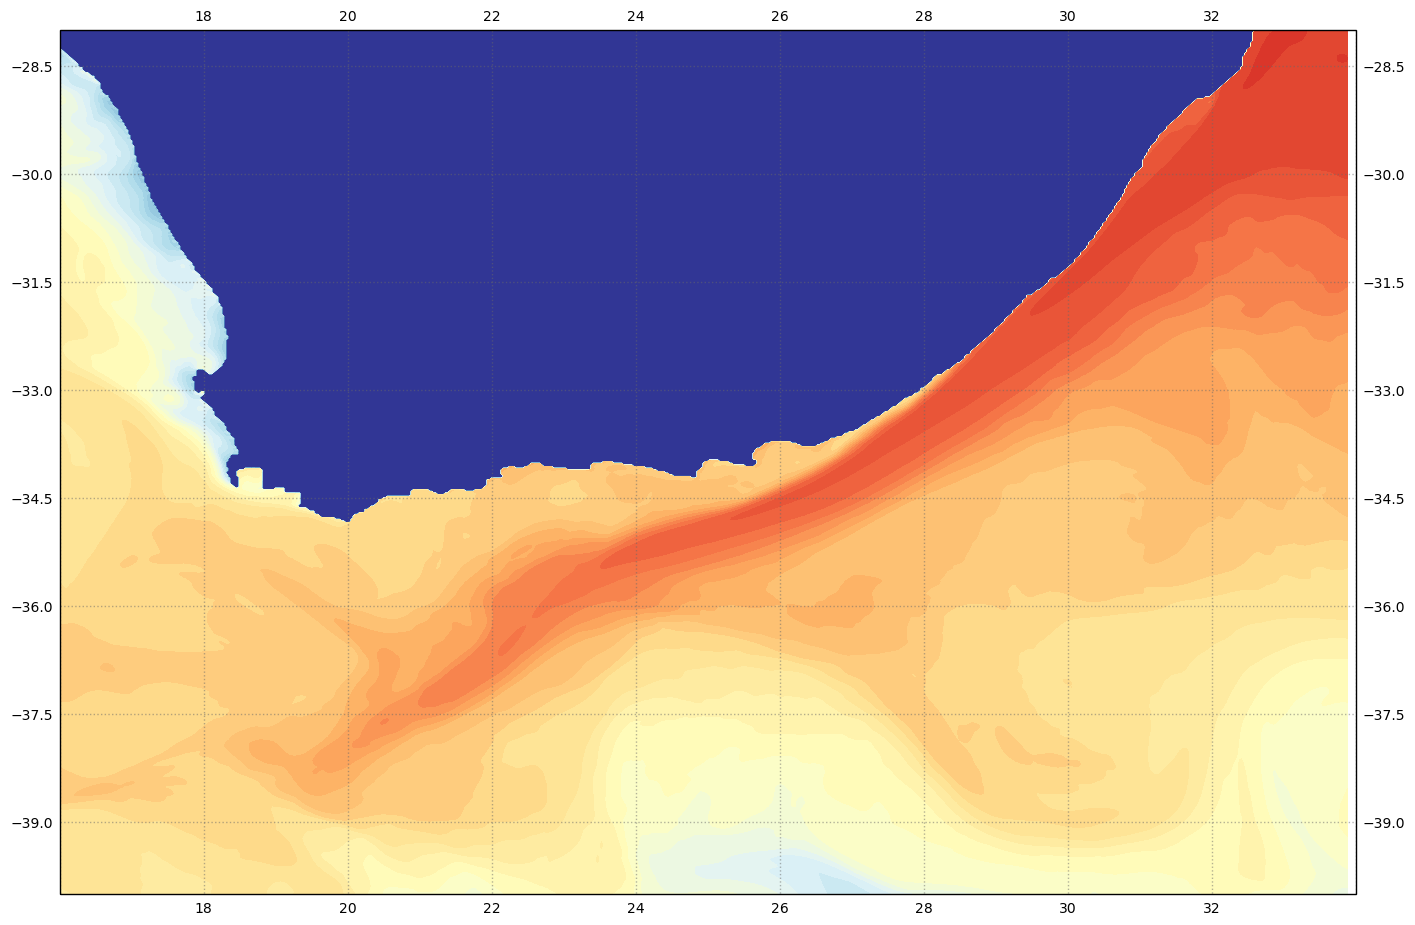

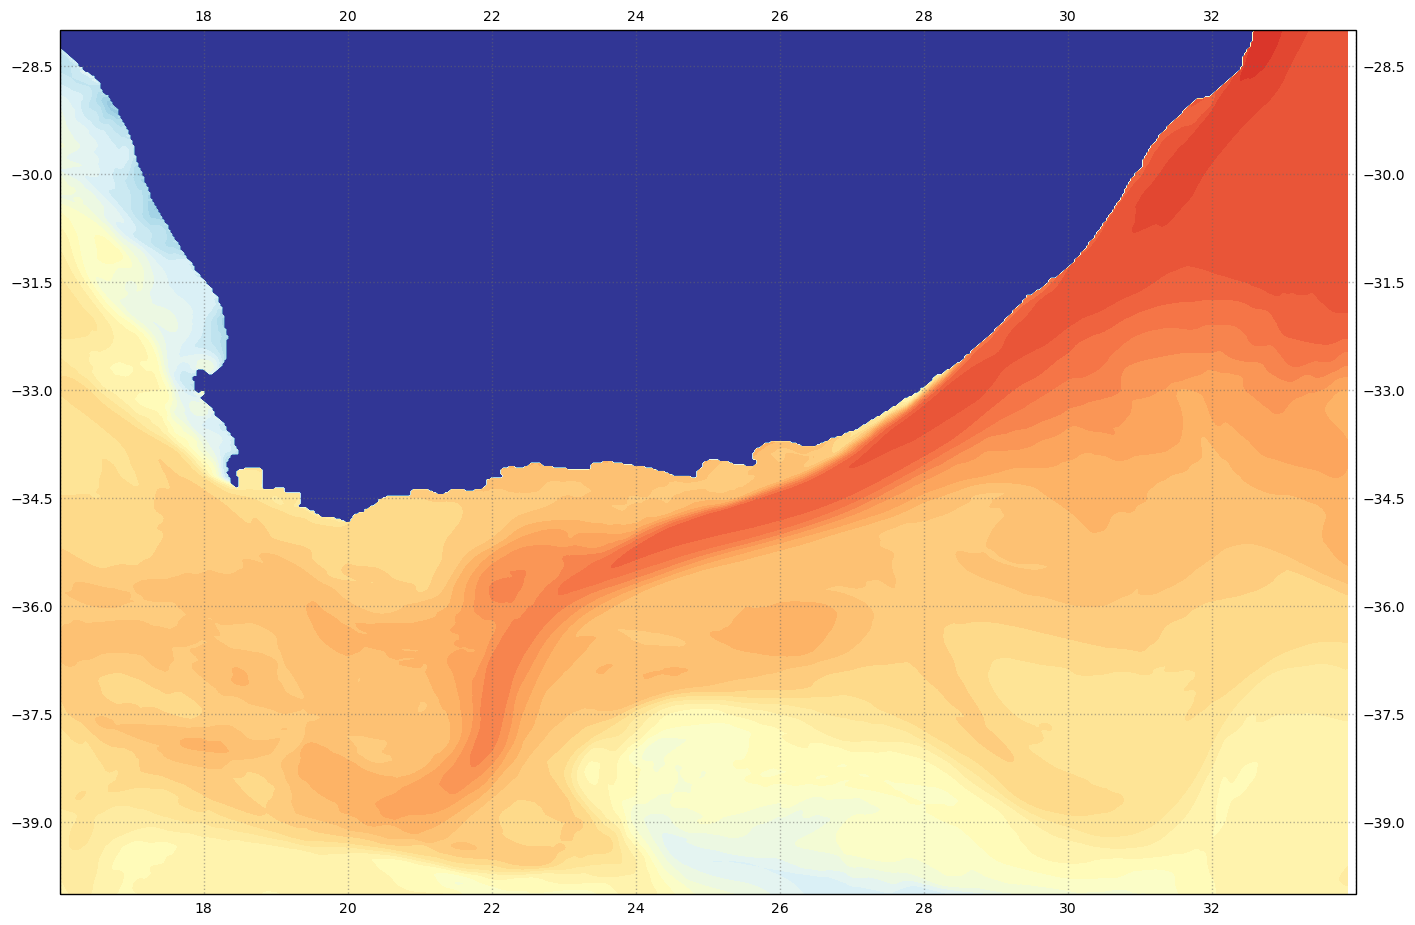

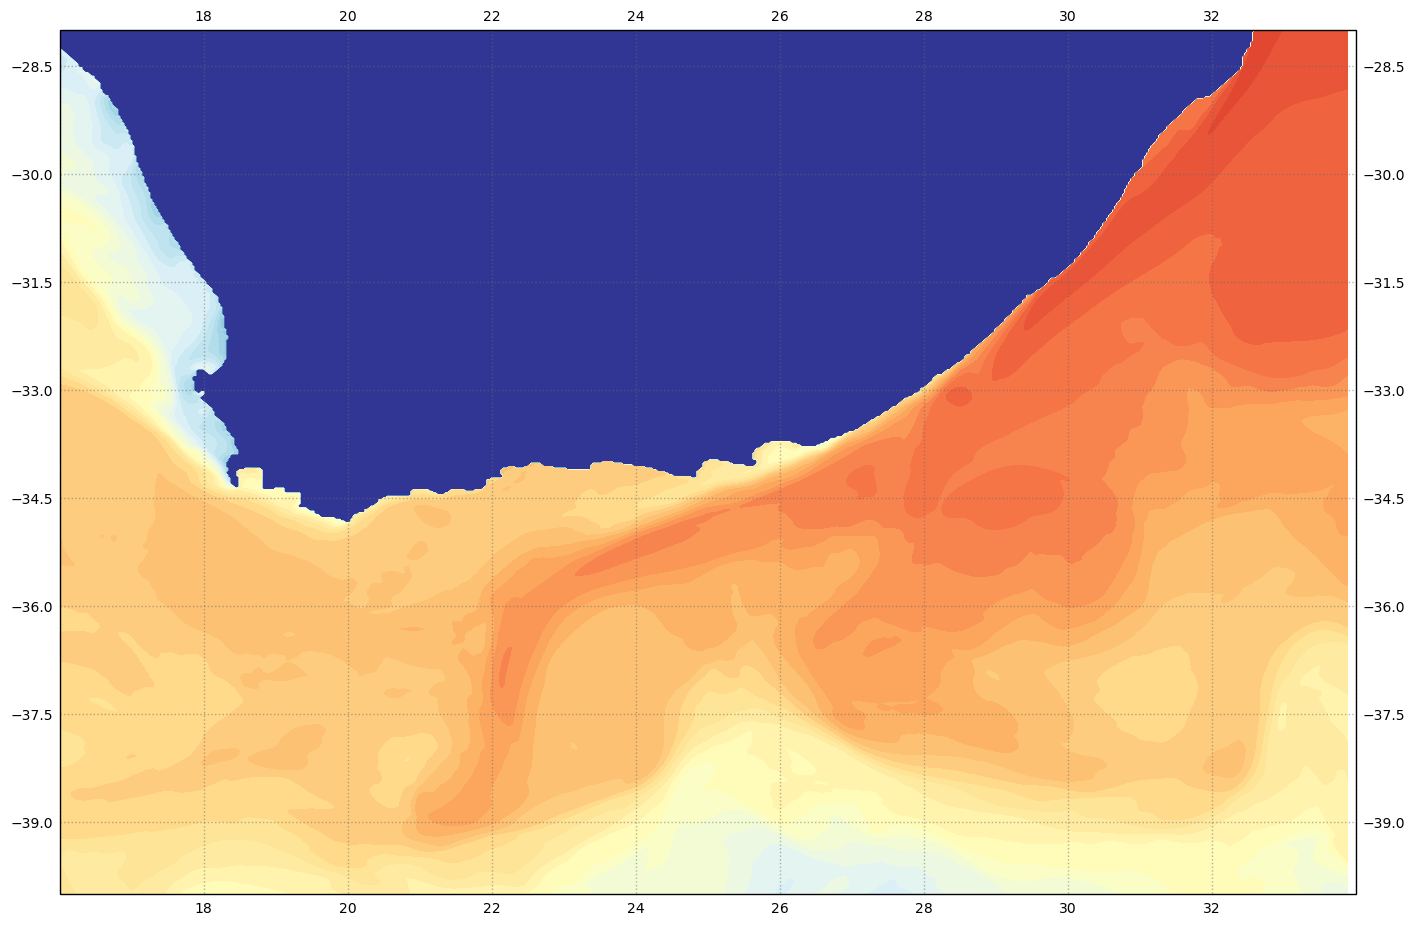

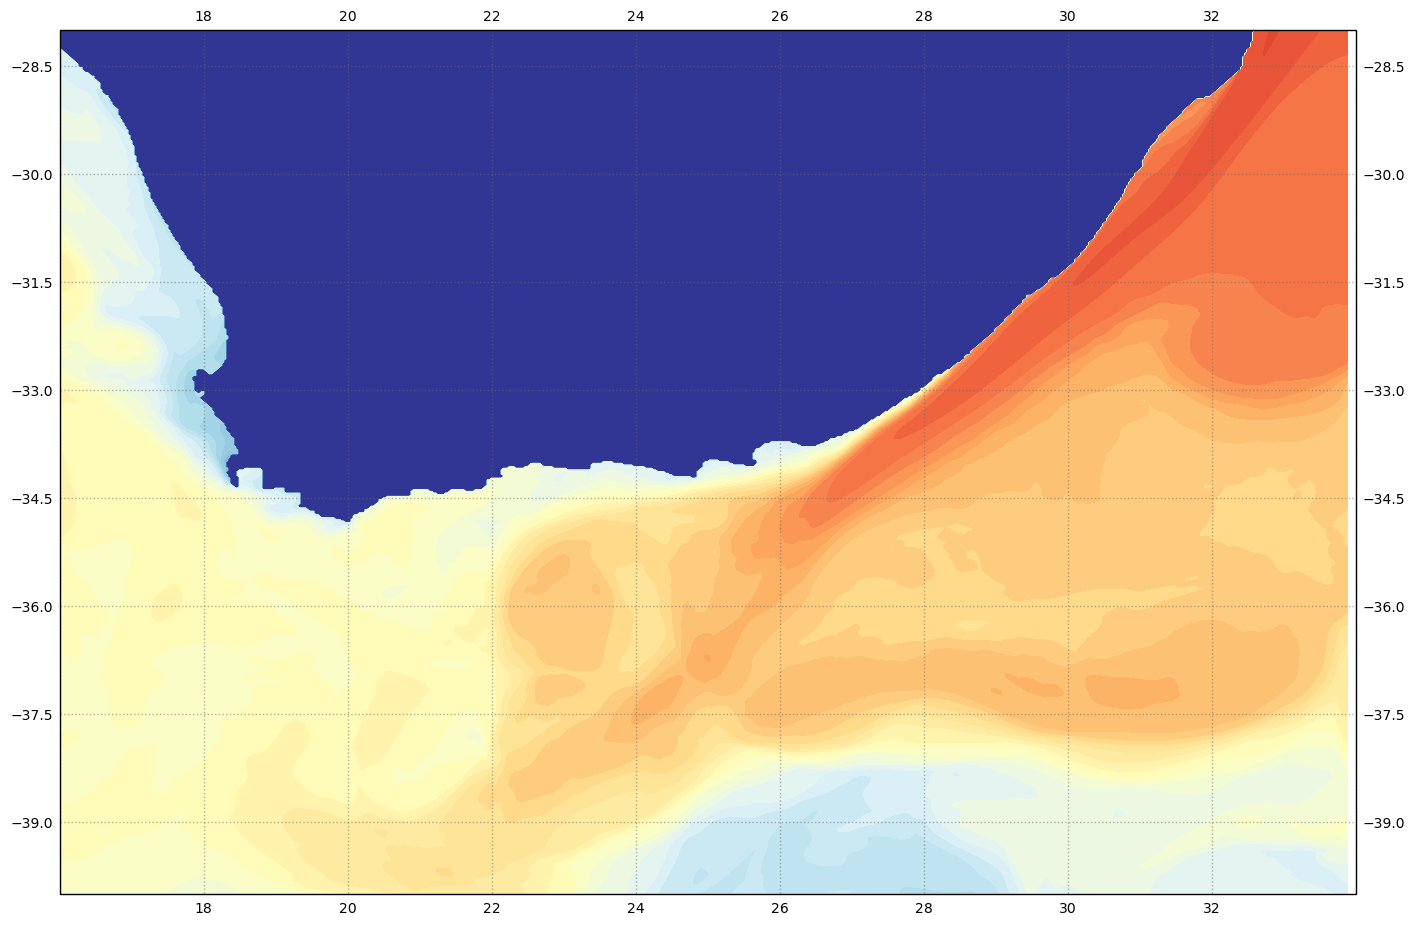

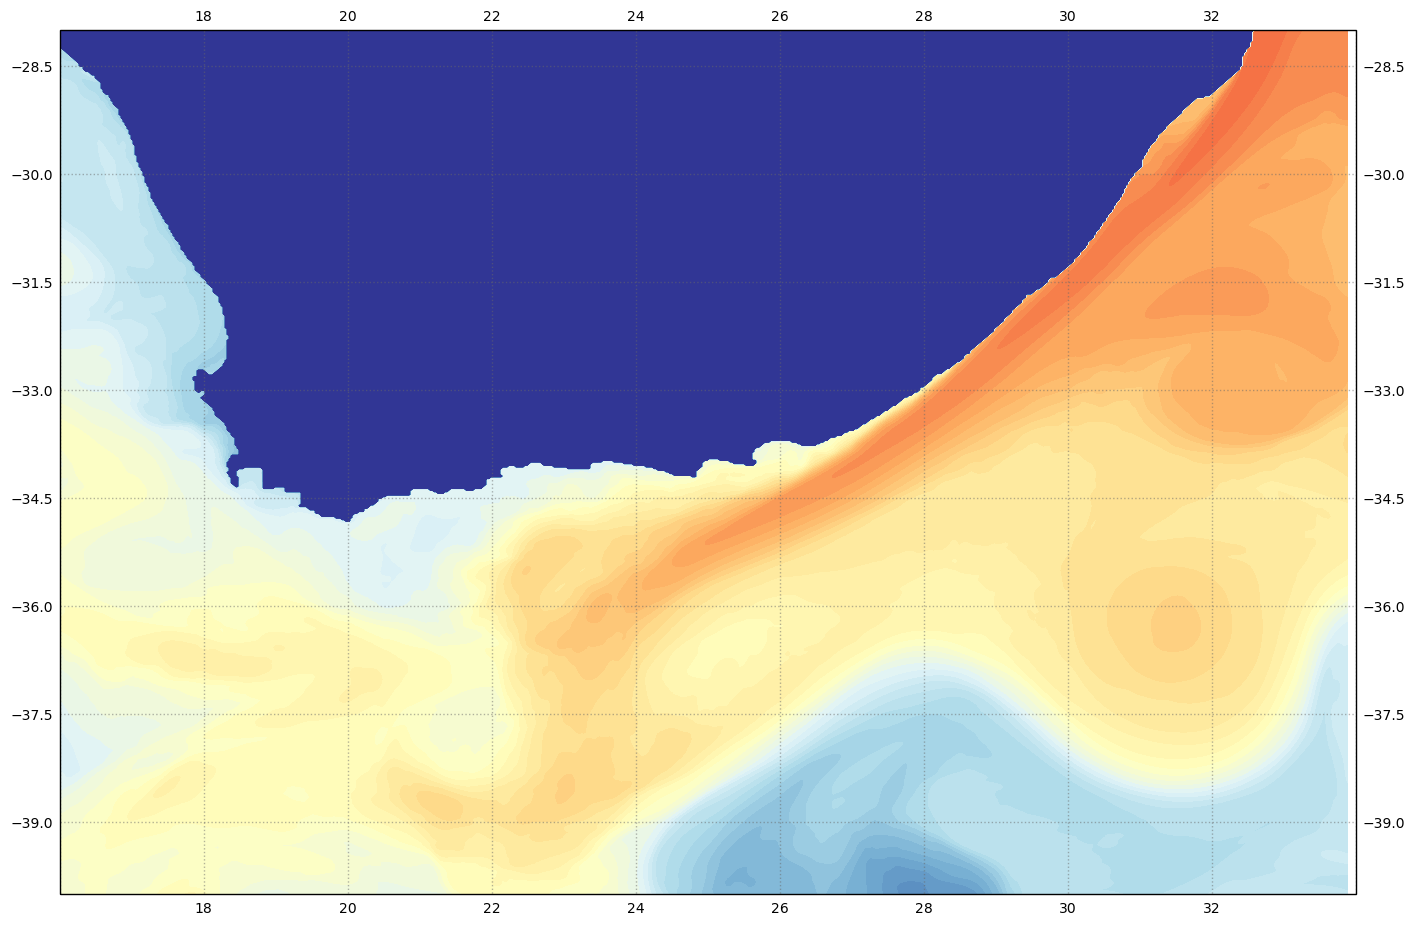

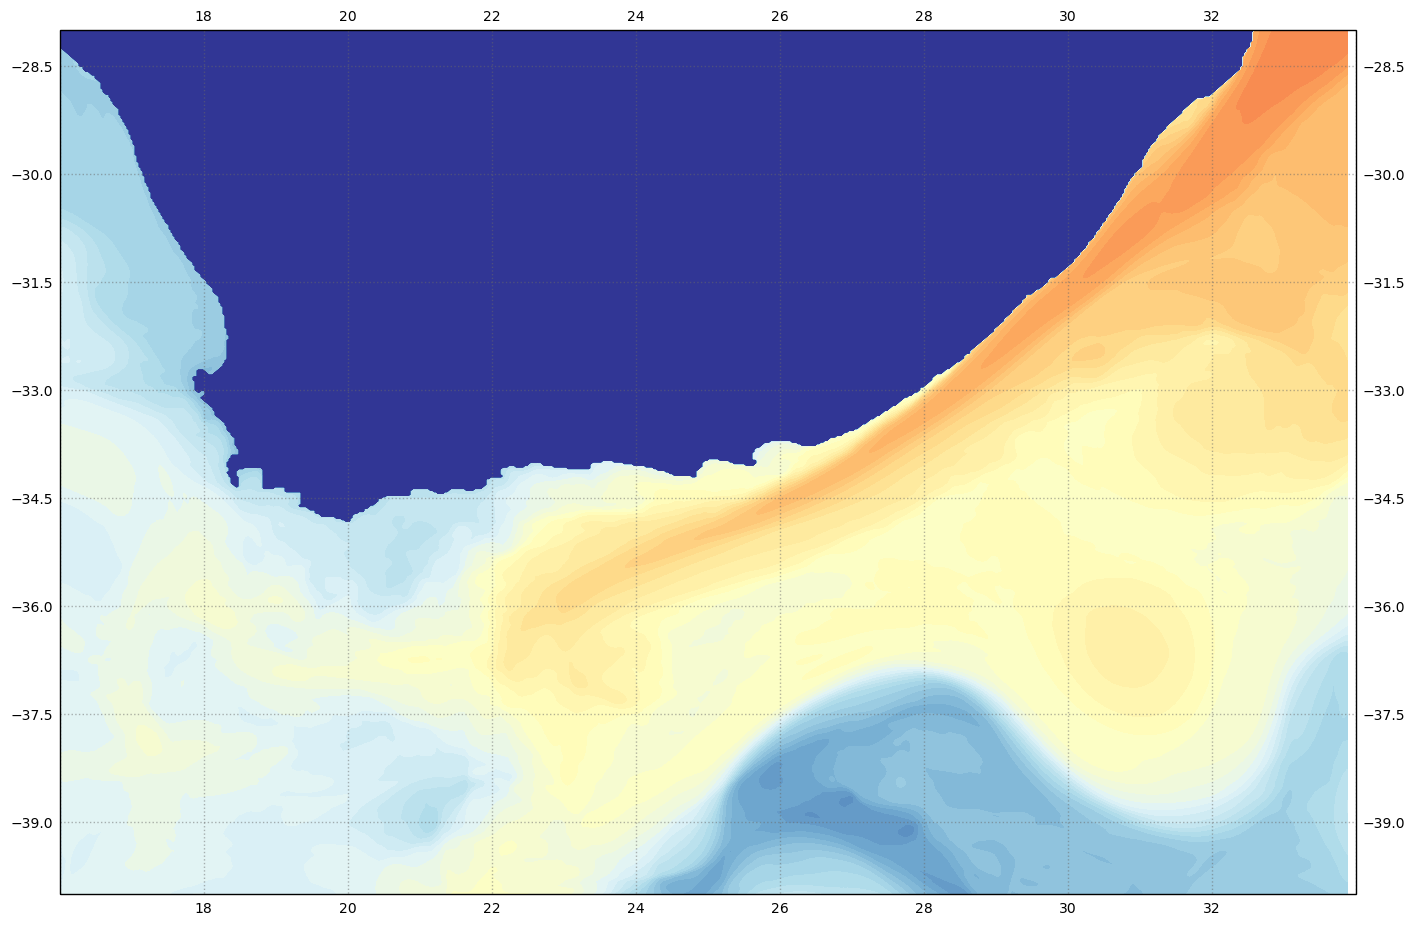

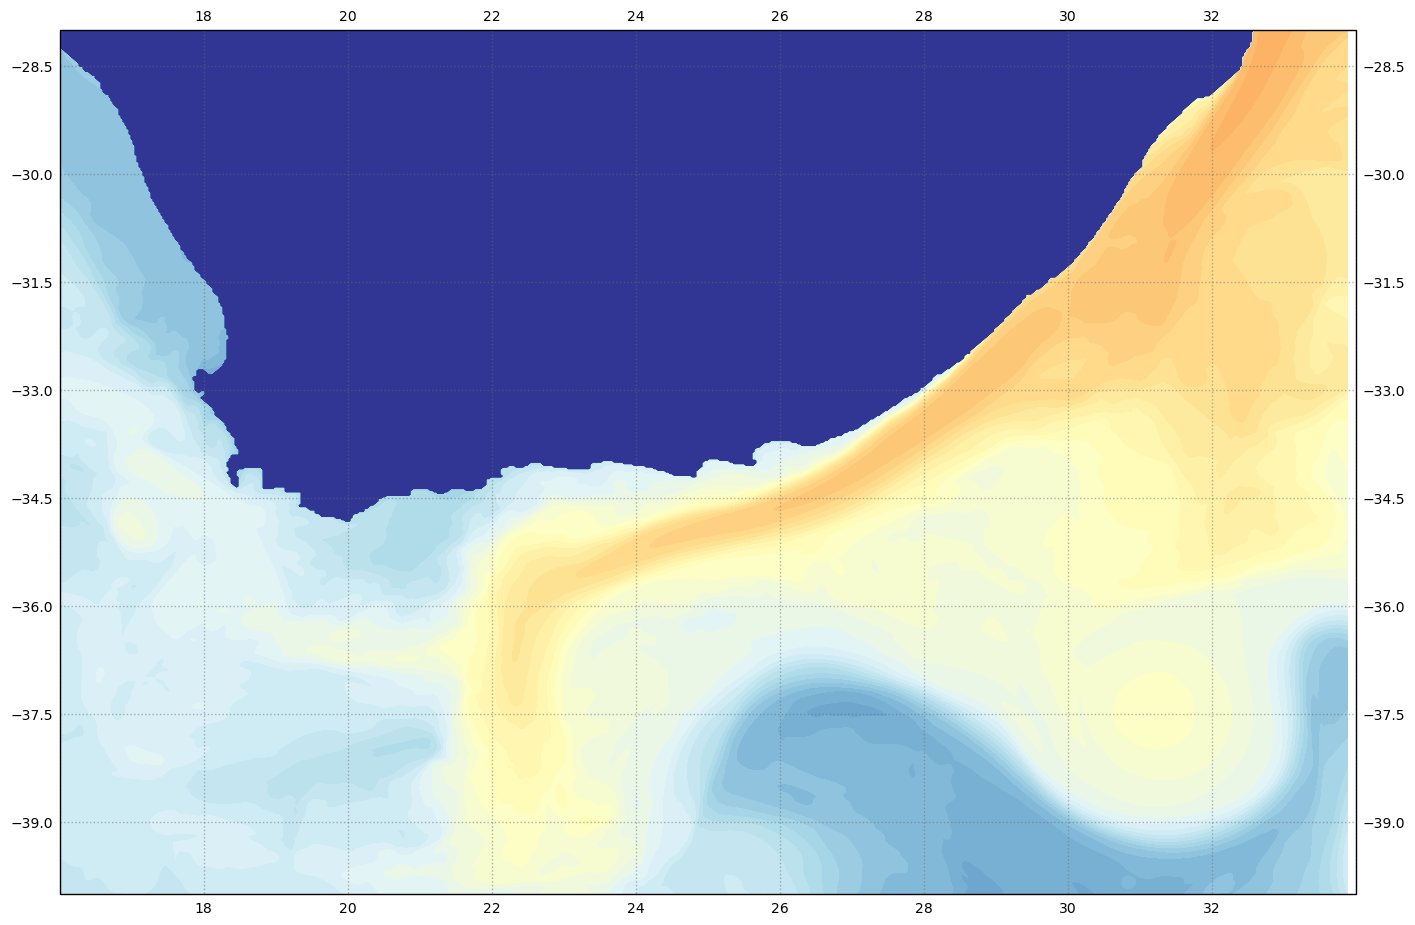

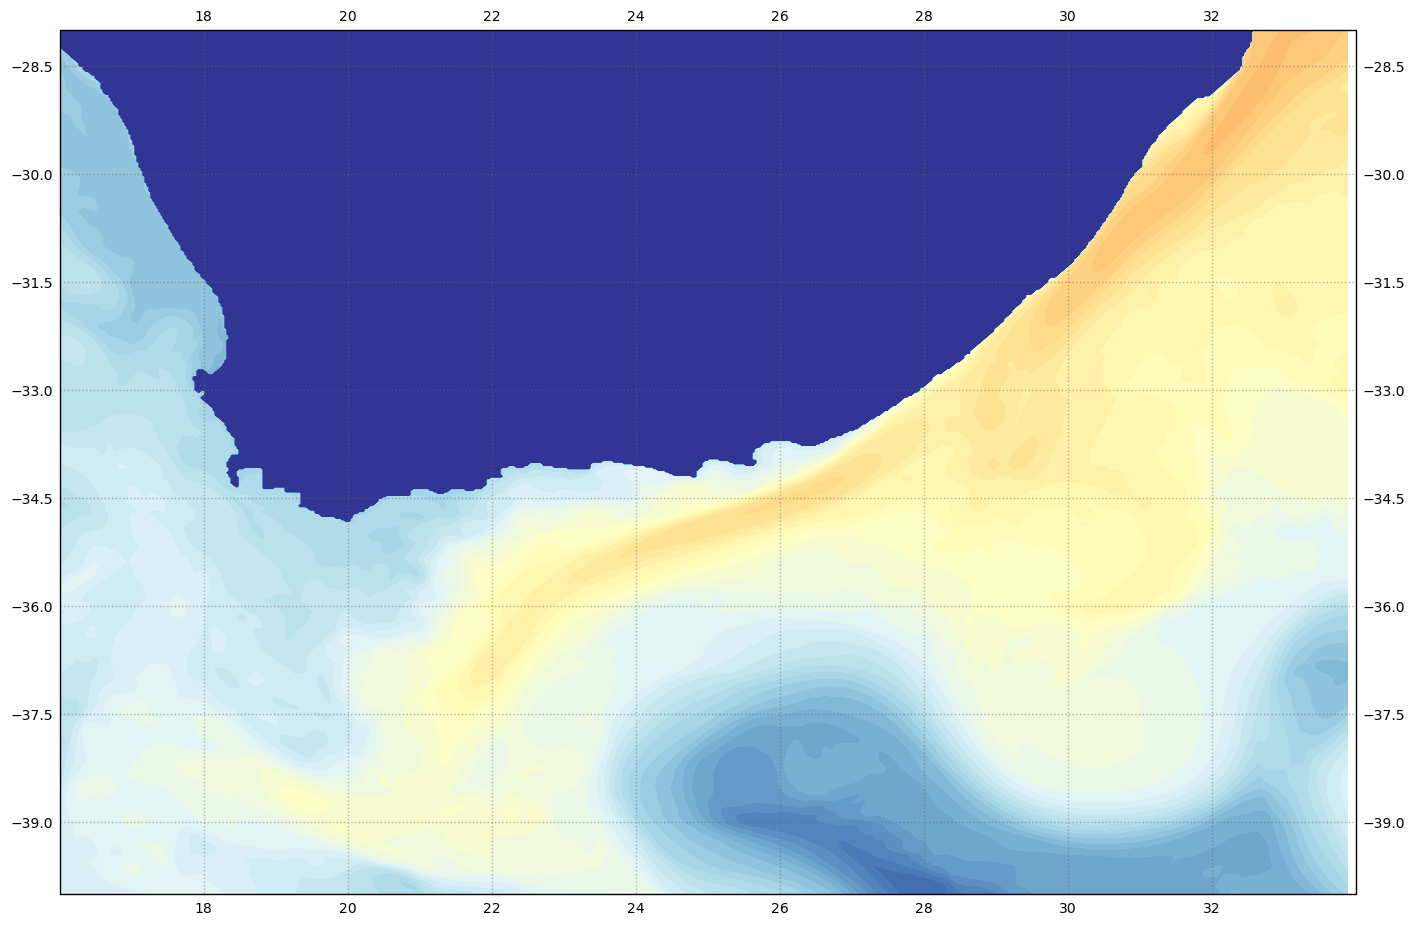

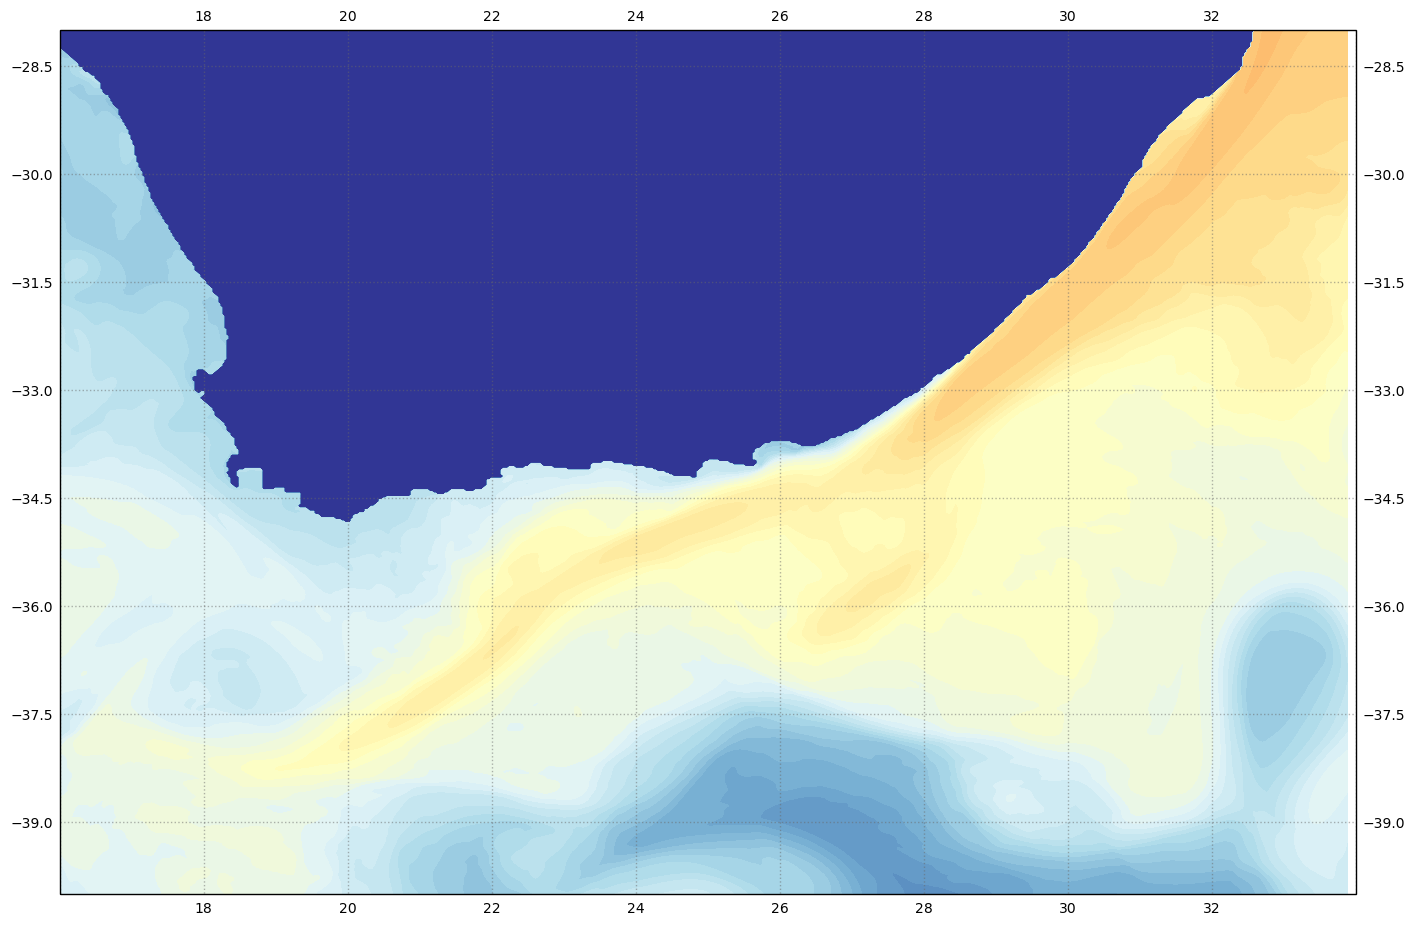

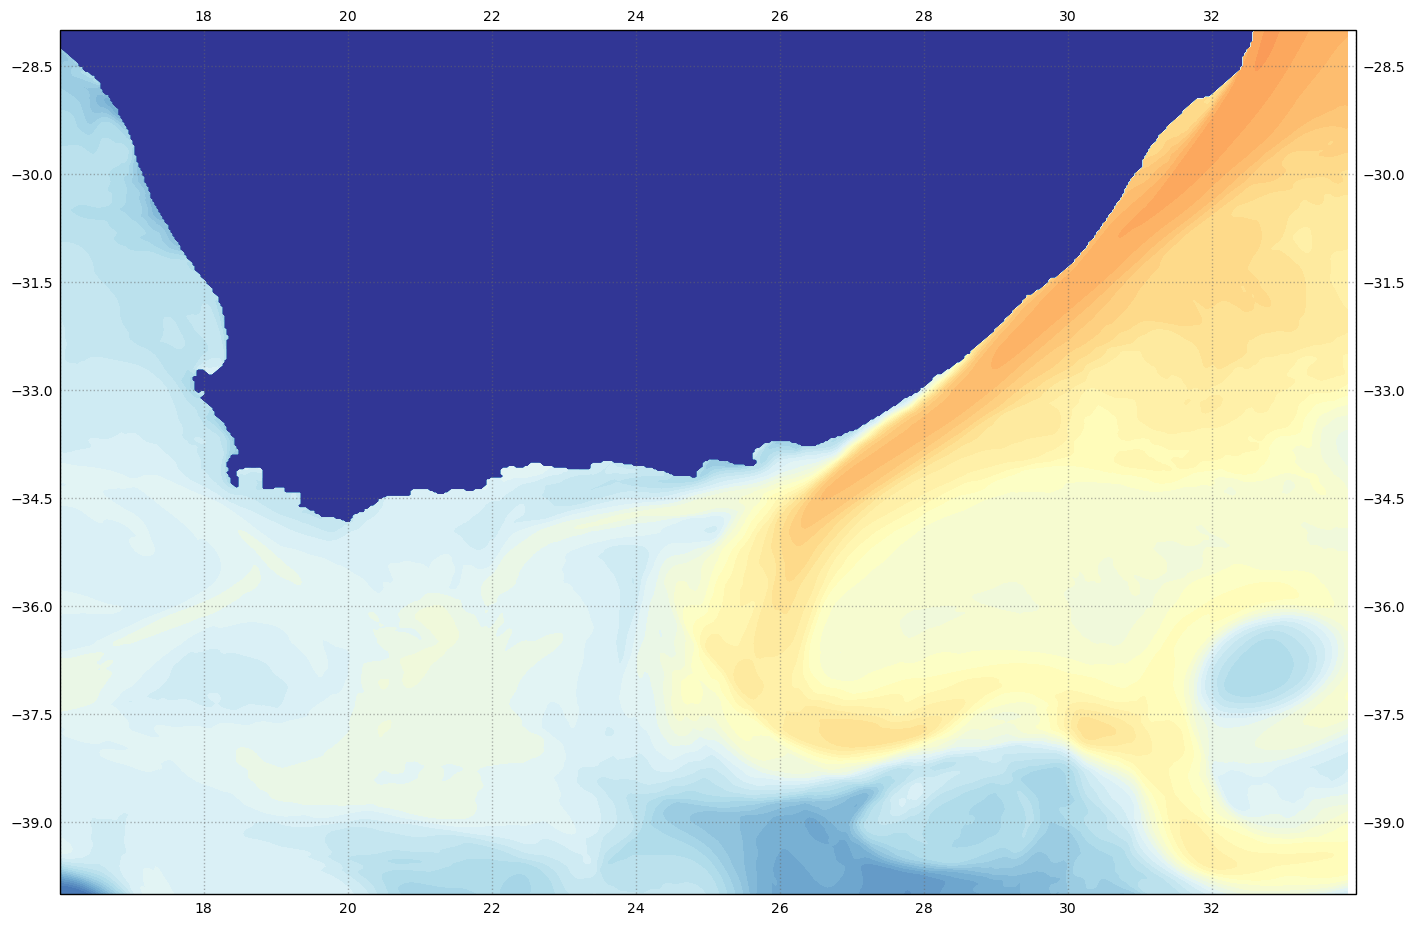

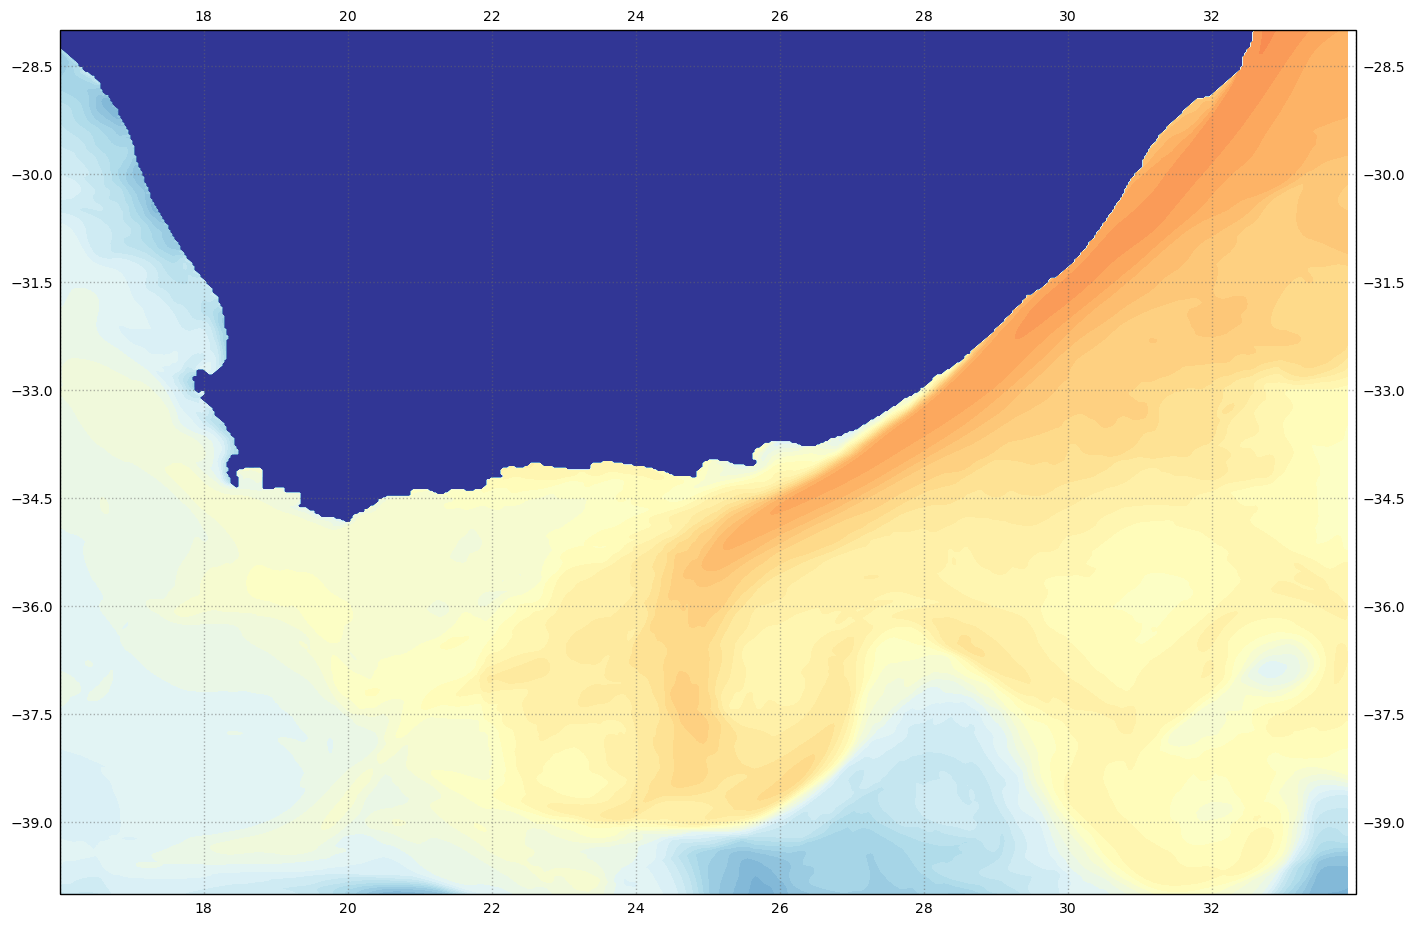

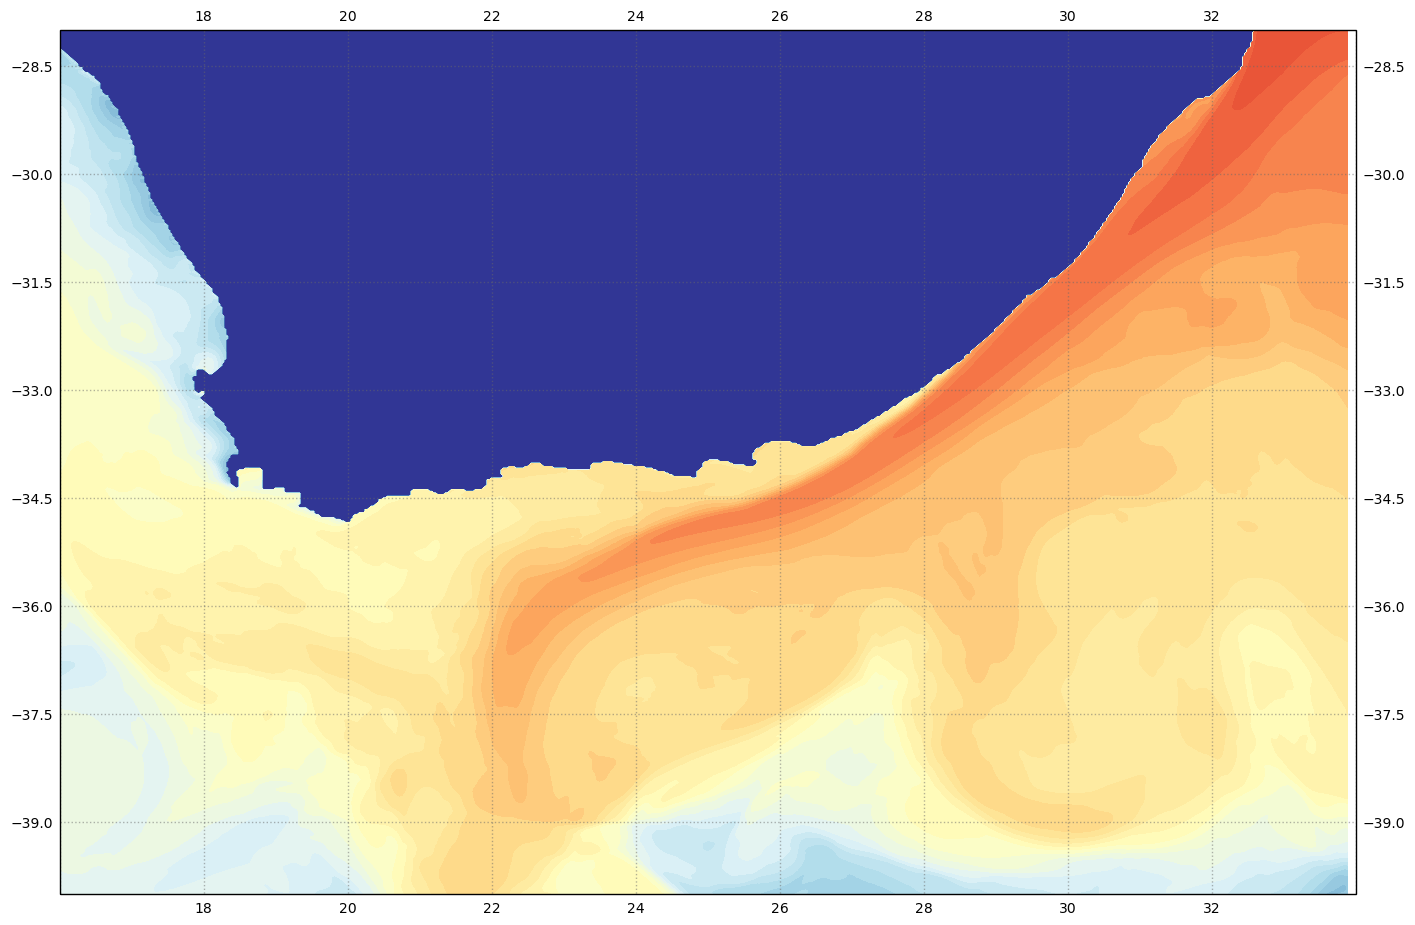

In [189]:
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import array

fname_path='/home/jenny/Desktop/ModelAssessment/'
file='temp'
suffix='.png'

Winter = []
Summer = []

for Y in range(1):
    print(Y)

    MonthlyReading=[]

    for j in range(len(temp)):
        print(j)

        fig = plt.figure(figsize=(19.20,10.80))
        ax = fig.add_axes([0, 0, 1, 1], projection=ccrs.PlateCarree())

        ax.add_feature(cartopy.feature.LAND, facecolor=(0.8,0.8,0.8))
        plt.contourf(lon_roms, lat_roms, temp[j,:,:], 64,
                     transform=ccrs.PlateCarree(),cmap='RdYlBu_r',vmin=10,vmax=30)    

        ax.set_position((0, 0, 1, 0.8)) # [left, bottom, width, height] positions your axis within the figure - these values won't apply to you -  play around with them - useful when you want to add multiple windows to the plot.
        ax.set_extent([16,34,-40,-28]) # [lon_west,lon_east,lat_south, lat_north] - choose whatever spatial extent you want to plot

        gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                              linewidth=1, color='dimgrey', alpha=0.5, linestyle=':')
        gl.right_labels = False # if you want to turn these off
        gl.top_labels = False # if you want to turn these off
        # Now plot the data...

        MR_lst = np.mean(temp[j,:,:])
        MonthlyReading.append([MR_lst])      

        plt.savefig(fname_path+file+str(j)+suffix, dpi=300, facecolor='w', edgecolor='w',figsize=(12,6),
            orientation='landscape', papertype=None, format=None,
            transparent=False, bbox_inches=None, pad_inches=None,
            frameon=None)
        
    MidYrMonths = np.mean(MonthlyReading[4+Y*j:9+Y*j:1])
    Winter.append[MidYrMonths]
    
    StartYrMonths = np.mean(MonthlyReading[1+Y*j:3+Y*j:1])  
    EndYrMonths = np.mean(MonthlyReading[10+Y*j:12+Y*j:1])
    Summer.append[np.mean([EndYrMonths,StartYrMonths])]
    

    

In [59]:
np.shape(temp[:0,:0]*mask_roms[:0,:0])

(0, 0)

In [95]:
np.shape(temp)

(12, 578, 674)

In [150]:
Array

In [151]:
MonthlyReading

array('d', [13.657641751631589, 13.657641751631589])

In [161]:
MonthlyReading

[[14.507429437601196],
 [14.613720694063463],
 [14.756248105147945],
 [13.821444178296359],
 [13.016599238483732],
 [12.251371804723902],
 [11.959007682438772],
 [11.69254517715826],
 [11.860268796053184],
 [12.103947966957032],
 [12.854452849709858],
 [13.657641751631589]]

In [162]:
sorted(MonthlyReading[0::4]+MonthlyReading[1::4])

[[11.860268796053184],
 [12.103947966957032],
 [12.251371804723902],
 [13.016599238483732],
 [14.507429437601196],
 [14.613720694063463]]

In [163]:
MonthlyReading[0::4]+MonthlyReading[1::4]

[[14.507429437601196],
 [13.016599238483732],
 [11.860268796053184],
 [14.613720694063463],
 [12.251371804723902],
 [12.103947966957032]]

In [174]:
Winter = np.mean(MonthlyReading[3+Y:9+Y:1])
Winter

12.4335394795257

In [171]:
MonthlyReading[3:9:1]


[[13.821444178296359],
 [13.016599238483732],
 [12.251371804723902],
 [11.959007682438772],
 [11.69254517715826],
 [11.860268796053184]]

In [178]:
len(MonthlyReading)


12

In [186]:
np.mean([1,2])

1.5